In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.groupby('State').mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Data Visualisation

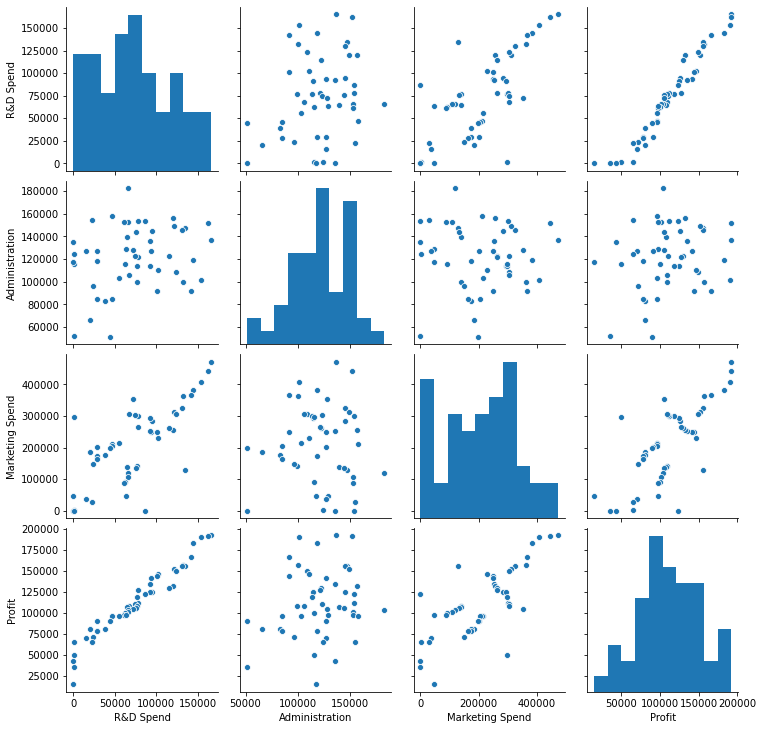

In [6]:
sns.pairplot(df)

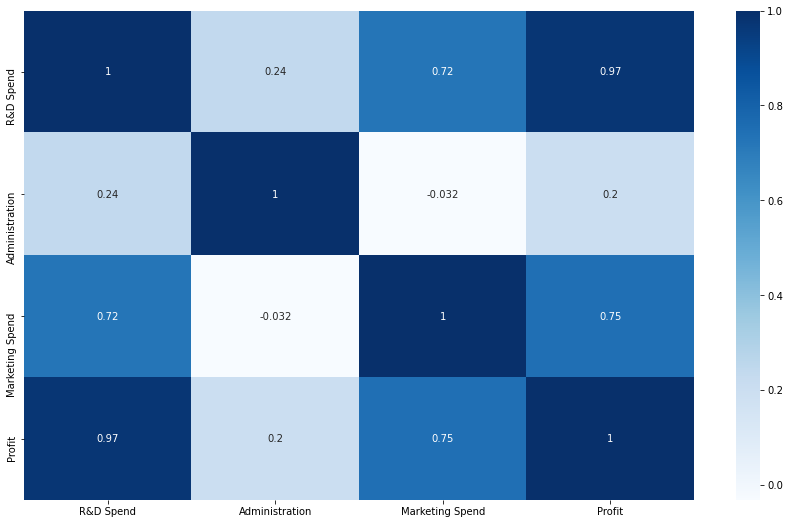

In [7]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr() , cmap = 'Blues' , annot = True)

# One-hot encoding on State

In [8]:
df2 = df.copy()

In [9]:
df2 = pd.get_dummies(data= df2, drop_first= True)
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


# Separating dependent and independent variables

In [10]:
x = df2.drop('Profit', axis = 1)
y = df2['Profit']

In [11]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [12]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

# Splitting data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2)

# 1. Building model on original data

In [15]:
import statsmodels.api as smf

In [16]:
model1 = smf.OLS(y_train,x_train).fit()

In [17]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.986     
Dependent Variable:     Profit           AIC:                         881.0333  
Date:                   2021-08-07 22:22 BIC:                         889.4777  
No. Observations:       40               Log-Likelihood:              -435.52   
Df Model:               5                F-statistic:                 574.4     
Df Residuals:           35               Prob (F-statistic):          1.54e-32  
R-squared (uncentered): 0.988            Scale:                       1.9171e+08
---------------------------------------------------------------------------------
                       Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
R&D Spend               0.6719     0.0800  8.3948  0.0000      0.5094      0.8343
Administration          0.3188     0.0390  8.1833  0.0000      0.2397      0.3978
Marketing Spend         0.0926     0.0264  3.5102  0.0013      0.0391      0.1462
State_Florida        3267.6986  5506.6583  0.5934  0.5567  -7911.4120  14446.8093
State_New York       4591.4599  5020.4502  0.9146  0.3667  -5600.5958  14783.5156
--------------------------------------------------------------------------------
Omnibus:                   0.811             Durbin-Watson:               2.201 
Prob(Omnibus):             0.667             Jarque-Bera (JB):            0.858 
Skew:                      -0.301            Prob(JB):                    0.651 
Kurtosis:                  2.610             Condition No.:               773950
================================================================================
* The condition number is large (8e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [18]:
r2_1 = model1.rsquared_adj
r2_1

0.9862406662326629

# 2.  Building model on data after removing State column

In [19]:
df2.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
State_Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


### Since , Profit and State variables are least correlated , its better to remove State feature

In [20]:
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
43,15505.73,127382.30,35534.17,0,1
8,120542.52,148718.95,311613.29,0,1
48,542.05,51743.15,0.00,0,1
17,94657.16,145077.58,282574.31,0,1
30,61994.48,115641.28,91131.24,1,0


In [21]:
x_train2 = x_train.drop(['State_Florida','State_New York'], axis = 1)
x_train2.head()

,R&D Spend,Administration,Marketing Spend
43,15505.73,127382.30,35534.17
8,120542.52,148718.95,311613.29
48,542.05,51743.15,0.00
17,94657.16,145077.58,282574.31
30,61994.48,115641.28,91131.24


In [22]:
model2 = smf.OLS(y_train , x_train2).fit()

In [23]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.987     
Dependent Variable:     Profit           AIC:                         878.0423  
Date:                   2021-08-07 22:22 BIC:                         883.1089  
No. Observations:       40               Log-Likelihood:              -436.02   
Df Model:               3                F-statistic:                 986.6     
Df Residuals:           37               Prob (F-statistic):          2.43e-35  
R-squared (uncentered): 0.988            Scale:                       1.8598e+08
------------------------------------------------------------------------------------
                     Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
------------------------------------------------------------------------------------
R&D Spend            0.6738       0.0788     8.5534     0.0000     0.5142     0.8335
Administration       0.3325       0.0356     9.3355     0.0000     0.2603     0.4046
Marketing Spend      0.0949       0.0257     3.6895     0.0007     0.0428     0.1470
--------------------------------------------------------------------------------
Omnibus:                    0.367             Durbin-Watson:               2.246
Prob(Omnibus):              0.832             Jarque-Bera (JB):            0.478
Skew:                       -0.201            Prob(JB):                    0.788
Kurtosis:                   2.647             Condition No.:               10   
================================================================================

"""

In [24]:
r2_2 = model2.rsquared_adj
r2_2

0.986651938087272

In [25]:
# log , sqrt , standard , normal 

# 3. Building Model on Log transformed data

In [26]:
df3 = df2.copy()

In [27]:
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [28]:
df3 = df3.drop(['State_Florida','State_New York'], axis = 1)
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [29]:
df3.iloc[:,-1] = np.log(df3.iloc[:,-1])

In [30]:
df3.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,12.166613
1,162597.70,151377.59,443898.53,12.164167
2,153441.51,101145.55,407934.54,12.160292
3,144372.41,118671.85,383199.62,12.116706
4,142107.34,91391.77,366168.42,12.020875


In [31]:
x3 = df3.drop('Profit' , axis = 1)
y3 = df3['Profit']

In [32]:
x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(x3,y3, test_size = 0.2)

In [33]:
model3 = smf.OLS(y_train3 , x_train3).fit()

In [34]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.967   
Dependent Variable:     Profit           AIC:                         175.3800
Date:                   2021-08-07 22:22 BIC:                         180.4466
No. Observations:       40               Log-Likelihood:              -84.690 
Df Model:               3                F-statistic:                 393.7   
Df Residuals:           37               Prob (F-statistic):          4.11e-28
R-squared (uncentered): 0.970            Scale:                       4.3692  
---------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend           -0.0000      0.0000    -1.0687    0.2921    -0.0000    0.0000
Administration       0.0001      0.0000    14.9075    0.0000     0.0001    0.0001
Marketing Spend      0.0000      0.0000     3.4809    0.0013     0.0000    0.0000
------------------------------------------------------------------------------
Omnibus:                   6.173            Durbin-Watson:               1.866
Prob(Omnibus):             0.046            Jarque-Bera (JB):            4.807
Skew:                      0.717            Prob(JB):                    0.090
Kurtosis:                  3.909            Condition No.:               9    
==============================================================================

"""

In [35]:
r2_3 = model3.rsquared_adj
r2_3

0.9671656319798309

# 4. Building Model on Sqrt transformed data 

In [36]:
y_train.head()

43     69758.98
8     152211.77
48     35673.41
17    125370.37
30     99937.59
Name: Profit, dtype: float64

In [37]:
y_train4 = np.sqrt(y_train)
y_train4.head()

43    264.119253
8     390.143269
48    188.874059
17    354.076785
30    316.129072
Name: Profit, dtype: float64

In [38]:
x_train2.head(3)

,R&D Spend,Administration,Marketing Spend
43,15505.73,127382.30,35534.17
8,120542.52,148718.95,311613.29
48,542.05,51743.15,0.00


In [39]:
model4 = smf.OLS(y_train4 , x_train2).fit()

In [40]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.975   
Dependent Variable:     Profit           AIC:                         433.1496
Date:                   2021-08-07 22:22 BIC:                         438.2162
No. Observations:       40               Log-Likelihood:              -213.57 
Df Model:               3                F-statistic:                 529.7   
Df Residuals:           37               Prob (F-statistic):          1.98e-30
R-squared (uncentered): 0.977            Scale:                       2748.5  
---------------------------------------------------------------------------------
                      Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------------------
R&D Spend             0.0007      0.0003     2.4533    0.0190    0.0001    0.0014
Administration        0.0016      0.0001    11.7706    0.0000    0.0013    0.0019
Marketing Spend       0.0003      0.0001     3.3227    0.0020    0.0001    0.0005
------------------------------------------------------------------------------
Omnibus:                   0.521            Durbin-Watson:               2.231
Prob(Omnibus):             0.771            Jarque-Bera (JB):            0.657
Skew:                      0.183            Prob(JB):                    0.720
Kurtosis:                  2.489            Condition No.:               10   
==============================================================================

"""

In [41]:
r2_4 = model4.rsquared_adj
r2_4

0.9753994625152052

# 5. Building Model on Standard scaling data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
y_train5 = np.array(y_train).reshape(-1,1)
y_train5 = sc.fit_transform(y_train5)

In [45]:
x_train6 = sc.fit_transform(x_train2)

In [46]:
x_train6[:5]

array([[-1.35425274,  0.15310411, -1.39456506],
       [ 1.07764078,  0.89534679,  0.93872547],
       [-1.7007035 , -2.47817145, -1.69488311],
       [ 0.47832277,  0.76867366,  0.69330171],
       [-0.27790901, -0.25533331, -0.92468484]])

In [47]:
model6 = smf.OLS(y_train5 , x_train6).fit()

In [48]:
model6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.940   
Dependent Variable:     y                AIC:                         4.0170  
Date:                   2021-08-07 22:22 BIC:                         9.0837  
No. Observations:       40               Log-Likelihood:              0.99149 
Df Model:               3                F-statistic:                 209.0   
Df Residuals:           37               Prob (F-statistic):          3.05e-23
R-squared (uncentered): 0.944            Scale:                       0.060236
-----------------------------------------------------------------------------------
             Coef.       Std.Err.         t         P>|t|        [0.025      0.975]
-----------------------------------------------------------------------------------
x1           0.8771        0.0637      13.7743      0.0000       0.7481      1.0061
x2          -0.0022        0.0433      -0.0499      0.9605      -0.0898      0.0855
x3           0.1248        0.0608       2.0541      0.0471       0.0017      0.2479
------------------------------------------------------------------------------
Omnibus:                   18.341           Durbin-Watson:              2.060 
Prob(Omnibus):             0.000            Jarque-Bera (JB):           27.167
Skew:                      -1.297           Prob(JB):                   0.000 
Kurtosis:                  6.094            Condition No.:              3     
==============================================================================

"""

In [49]:
r2_6 = model6.rsquared_adj
r2_6

0.9397642845396599

# 6. Building Model on Normalizing data

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scale = MinMaxScaler()

In [52]:
y_train7 = np.array(y_train).reshape(-1,1)

In [53]:
y_train7 = scale.fit_transform(y_train7)

In [54]:
y_train7[:5]

array([[0.31015569],
       [0.77446805],
       [0.11821128],
       [0.62331739],
       [0.48009902]])

In [55]:
x_train8 = scale.fit_transform(x_train2)

In [56]:
x_train8[:5]

array([[0.09377566, 0.57930693, 0.07531871],
       [0.72901786, 0.74173276, 0.66049977],
       [0.00327821, 0.00350184, 0.        ],
       [0.57246821, 0.71401273, 0.59894835],
       [0.37493063, 0.48992809, 0.19316302]])

In [57]:
model8 = smf.OLS(y_train7 , x_train8).fit()

In [58]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              733.1
Date:                Sat, 07 Aug 2021   Prob (F-statistic):                    5.46e-33
Time:                        22:22:43   Log-Likelihood:                          46.581
No. Observations:                  40   AIC:                                     -87.16
Df Residuals:                      37   BIC:                                     -82.10
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6694      0.077      8.674      0.000       0.513       0.826
x2             0.2151      0.041      5.238      0.000       0.132       0.298
x3             0.2636      0.069      3.806      0.001       0.123       0.404
==============================================================================
Omnibus:                        0.934   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.941
Skew:                          -0.218   Prob(JB):                        0.625
Kurtosis:                       2.388   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
r2_8 = model8.rsquared_adj
r2_8

0.9821130439081597

In [61]:
final_data = [{'R Square Values': model1.rsquared, 'AIC':model1.aic}, {'R Square Values': model2.rsquared, 'AIC':model2.aic}, \
        {'R Square Values': model3.rsquared, 'AIC':model3.aic}, {'R Square Values': model4.rsquared, 'AIC':model4.aic}, \
        {'R Square Values': model6.rsquared, 'AIC':model6.aic} , {'R Square Values': model8.rsquared, 'AIC':model8.aic}] 

# Lists of dictionaries and row index.
final_df = pd.DataFrame(final_data, index =['Model without any modification', 'Transformed with removing insignifact variables',\
                                'Transformed using ln-transform','Transformed with square root transform',\
                                'Transformed with Standard Scaling data','Transformed with Normalizing data'])
  
# Print the data
final_df

,R Square Values,AIC
Model without any modification,0.987961,881.033328
Transformed with removing insignifact variables,0.987653,878.042273
Transformed using ln-transform,0.969628,175.379984
Transformed with square root transform,0.977245,433.149583
Transformed with Standard Scaling data,0.944282,4.017028
Transformed with Normalizing data,0.983455,-87.161763


# On-observing this dataframe , it can be observed that the model with Normalizing transformation has very high Rsquared value as well comparatively low AIC

# It can be concluded that transforming data by Normalizing is best model for this data